In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/preterm-data-set/preterm.csv


In [3]:
import pandas as pd

# Φόρτωση δεδομένων
df = pd.read_csv("/kaggle/input/preterm-data-set/preterm.csv")




In [5]:
# Εμφάνιση πρώτων γραμμών
print(df.head())



   Count Contraction  lenght of contraction        STD  Entropy  \
0              11055                 218320  53231.010    1.860   
1               9118                 222820  62367.488    1.580   
2               7925                  13481  60503.050    2.067   
3              12451                  17474  53628.078    1.731   
4              11152                 218320  53317.910    1.857   

   Contraction times  Pre-term  
0                  2         1  
1                  2         1  
2                  2         1  
3                  2         1  
4                  2         1  


In [6]:
# Πληροφορίες dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Count Contraction      58 non-null     int64  
 1   lenght of contraction  58 non-null     int64  
 2   STD                    58 non-null     float64
 3   Entropy                58 non-null     float64
 4   Contraction times      58 non-null     int64  
 5   Pre-term               58 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.8 KB
None


In [7]:
print(df.columns)

Index(['Count Contraction', 'lenght of contraction', 'STD', 'Entropy',
       'Contraction times', 'Pre-term'],
      dtype='object')


Confusion Matrix:
 [[8 0]
 [0 4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

ROC AUC Score: 1.0


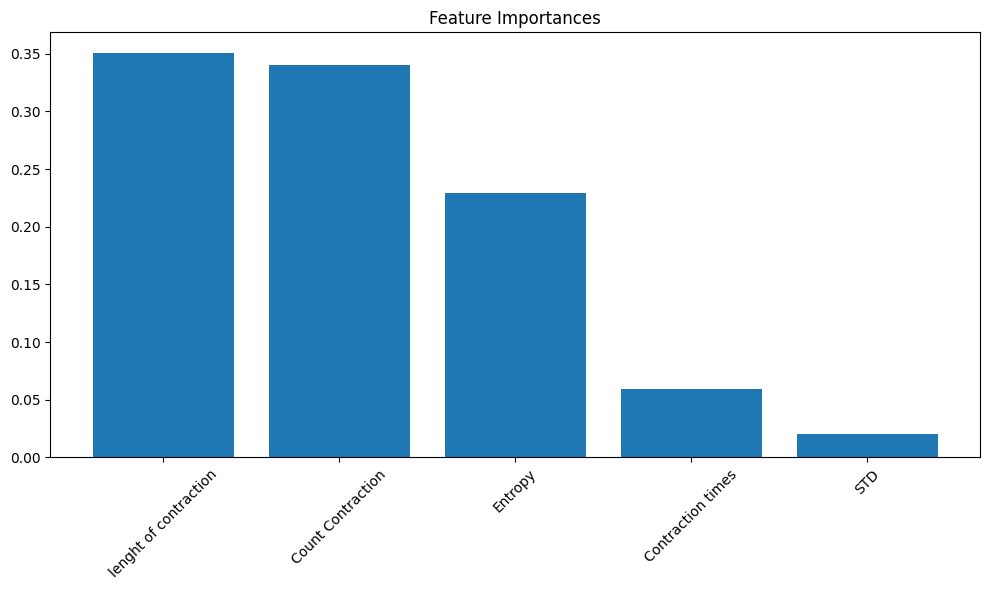

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Φόρτωση
df = pd.read_csv("/kaggle/input/preterm-data-set/preterm.csv")

# 2. Διαχωρισμός Χ και y
X = df.drop("Pre-term", axis=1)
y = df["Pre-term"]

# 3. Κανονικοποίηση
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Διάσπαση σε training/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Εκπαίδευση μοντέλου
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Αξιολόγηση
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# 7. Σημαντικότητα Χαρακτηριστικών
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()


In [10]:
!pip install -U scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 78.4 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [12]:
!pip install -U scikit-learn imbalanced-learn


Σχήμα: (58, 6)
Pre-term
0    39
1    19
Name: count, dtype: int64

📊 Confusion Matrix:
 [[8 0]
 [0 4]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

🎯 ROC AUC: 1.0

🔁 10-Fold Cross-Validated AUC: 1.0000 (+/- 0.0000)


/tmp/ipykernel_35/1981524773.py:53: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


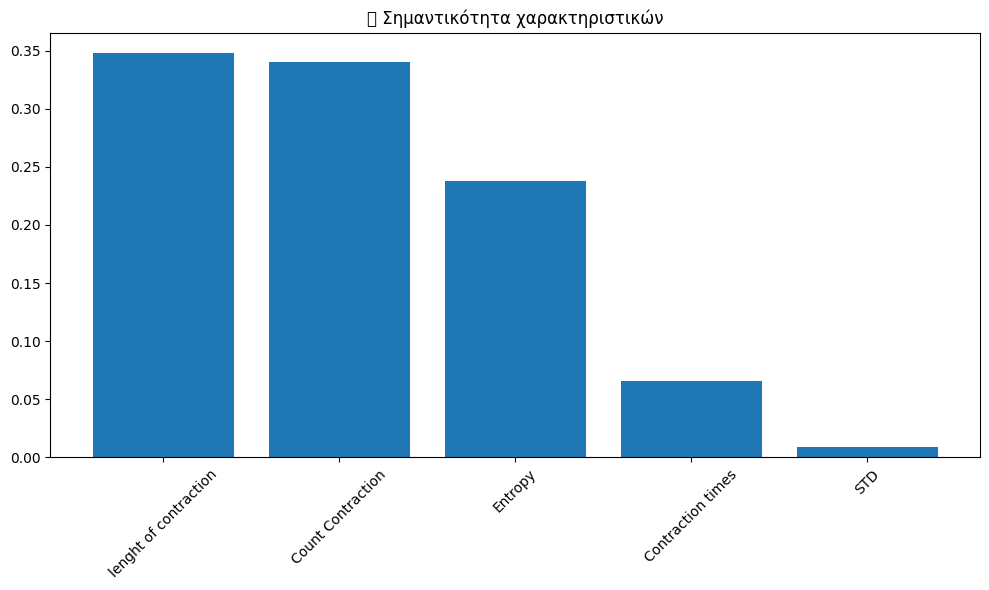

In [14]:
# 📦 Βιβλιοθήκες
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ✅ 1. Φόρτωση δεδομένων
df = pd.read_csv("/kaggle/input/preterm-data-set/preterm.csv")

# Έλεγχος target
print("Σχήμα:", df.shape)
print(df['Pre-term'].value_counts())  # Έλεγχος ισορροπίας

# ✅ 2. Χαρακτηριστικά / στόχος
X = df.drop("Pre-term", axis=1)
y = df["Pre-term"]

# ✅ 3. Κανονικοποίηση
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 4. Διάσπαση σε Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ 5. Random Forest με ισοστάθμιση κατηγοριών
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ✅ 6. Αξιολόγηση
y_pred = model.predict(X_test)
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("🎯 ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# ✅ 7. Cross-validation (10-fold)
scores = cross_val_score(model, X_scaled, y, cv=10, scoring='roc_auc')
print(f"\n🔁 10-Fold Cross-Validated AUC: {scores.mean():.4f} (+/- {scores.std():.4f})")

# ✅ 8. Σημαντικότητα χαρακτηριστικών
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("📌 Σημαντικότητα χαρακτηριστικών")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


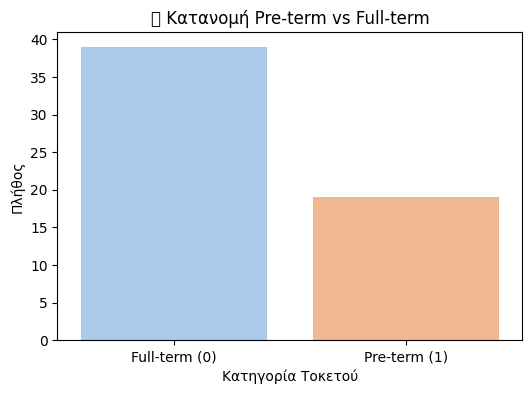

In [15]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='pastel')
plt.title("📊 Κατανομή Pre-term vs Full-term")
plt.xticks([0, 1], ['Full-term (0)', 'Pre-term (1)'])
plt.xlabel("Κατηγορία Τοκετού")
plt.ylabel("Πλήθος")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


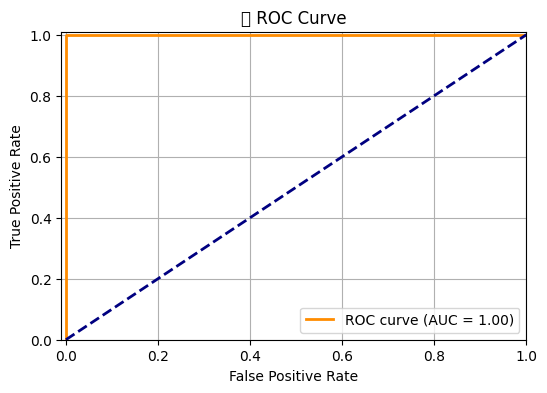

In [16]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


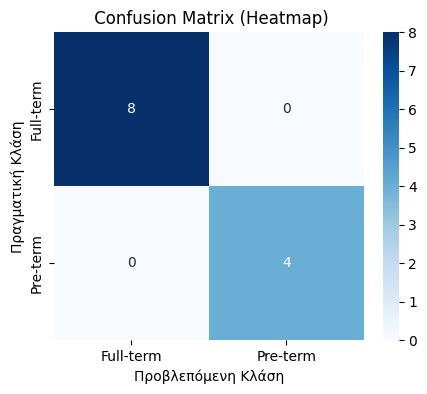

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Full-term', 'Pre-term'], yticklabels=['Full-term', 'Pre-term'])
plt.ylabel('Πραγματική Κλάση')
plt.xlabel('Προβλεπόμενη Κλάση')
plt.title(' Confusion Matrix (Heatmap)')
plt.show()


/tmp/ipykernel_35/3083542844.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/3083542844.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/3083542844.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/3083542844.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


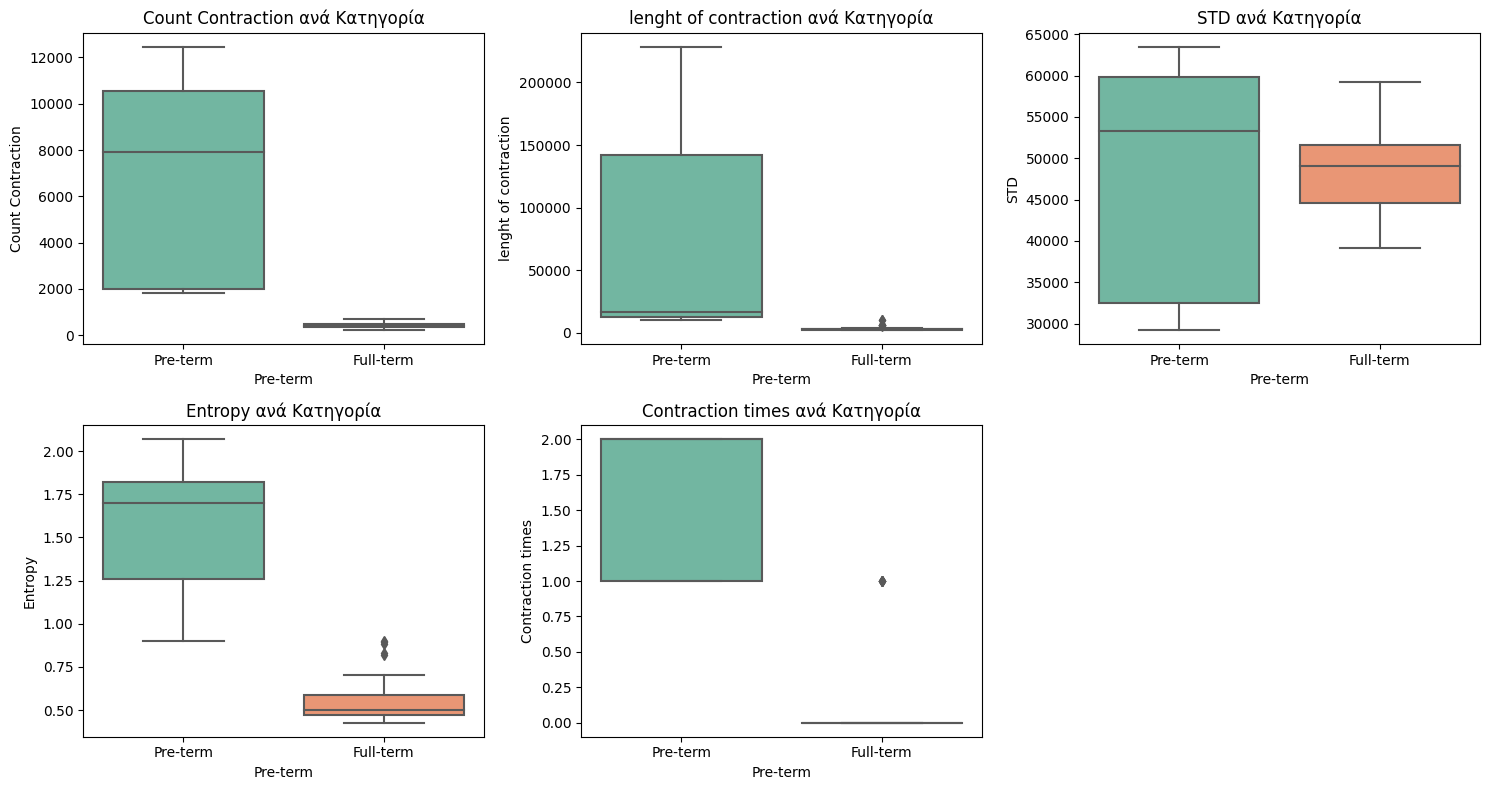

In [18]:
# Προσθέτουμε ξανά τη στήλη στόχου για plotting
df_plot = df.copy()
df_plot['Pre-term'] = df_plot['Pre-term'].replace({0: 'Full-term', 1: 'Pre-term'})

plt.figure(figsize=(15, 8))
for i, col in enumerate(X.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Pre-term', y=col, data=df_plot, palette="Set2")
    plt.title(f'{col} ανά Κατηγορία')
    plt.tight_layout()
plt.show()
